In [122]:
#import neccesary library
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.simplefilter("ignore",UserWarning)

### Read the csv file using pandas

In [123]:
takehome_user_engagement=pd.read_csv(r"C:\Users\milan\Desktop\Task5\takehome_user_engagement.csv")
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [124]:
takehome_user_engagement.rename(columns = {"time_stamp":"creation_time"},inplace=True)

In [125]:
takehome_users=pd.read_csv(r"C:\Users\milan\Desktop\Task5\takehome_users.csv", encoding='latin1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [126]:
takehome_users.rename(columns = {"object_id" : "user_id"},inplace=True)
takehome_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


### Merging data

In [127]:
take_user=pd.merge(takehome_user_engagement,takehome_users,on="user_id")
take_user.drop(columns = ['creation_time_y'],inplace = True)
take_user.rename(columns = {"creation_time_x":"creation_time"},inplace = True)
take_user.head(2)

,creation_time,user_id,visited,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


# Description of data feature

● name:  the  user's  name
● object_id:   the  user's  id
● email:  email  address
● creation_source:   how  their  account  was  created.  This  takes  on  one
of  5  values:
○ PERSONAL_PROJECTS:  invited  to  join  another  user's
personal  workspace
○ GUEST_INVITE:  invited  to  an  organization  as  a  guest
(limited  permissions)
○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
○ SIGNUP:  signed  up  via  the  website
○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google
Authentication  (using  a  Google  email  account  for  their  login
id)
● creation_time:  when  they  created  their  account
● last_session_creation_time:   unix  timestamp  of  last  login
● opted_in_to_mailing_list:  whether  they  have  opted  into  receiving
marketing  emails
● enabled_for_marketing_drip:  whether  they  are  on  the  regular
marketing  email  drip
● org_id:   the  organization  (group  of  users)  they  belong  to
● invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).


# Data Cleaning

In [128]:
#checking the shape of the data
take_user.shape

(207917, 11)

In [129]:
#checking the datatype of all feature in the take_user
take_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   creation_time               207917 non-null  object 
 1   user_id                     207917 non-null  int64  
 2   visited                     207917 non-null  int64  
 3   name                        207917 non-null  object 
 4   email                       207917 non-null  object 
 5   creation_source             207917 non-null  object 
 6   last_session_creation_time  207917 non-null  float64
 7   opted_in_to_mailing_list    207917 non-null  int64  
 8   enabled_for_marketing_drip  207917 non-null  int64  
 9   org_id                      207917 non-null  int64  
 10  invited_by_user_id          116887 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 19.0+ MB


In [130]:
#checking the descriptive statistics like mean,count,25%,75%,100%,min,max for the take_user
take_user.describe()

,user_id,visited,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,207917.000000,207917.0,2.079170e+05,207917.000000,207917.000000,207917.000000,116887.000000
mean,5913.314197,1.0,1.399439e+09,0.258137,0.154533,164.315895,5972.167555
std,3394.941674,0.0,8.294017e+06,0.437611,0.361460,121.165846,3247.095621
min,1.000000,1.0,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3087.000000,1.0,1.401045e+09,0.000000,0.000000,60.000000,3269.000000
50%,5682.000000,1.0,1.401665e+09,0.000000,0.000000,145.000000,5972.000000
75%,8944.000000,1.0,1.401868e+09,1.000000,0.000000,260.000000,8513.000000
max,12000.000000,1.0,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [131]:
#Now changing the creation time to date timestamp for taking the year,month seperately using pandas datetime function
take_user["creation_time"]=pd.to_datetime(take_user["creation_time"])

In [132]:
#Checking the null value(data is missing or not)
take_user.isna().sum()

creation_time                     0
user_id                           0
visited                           0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
dtype: int64

#### Fill the nan values of last_session_creation_time with the Average of it 

In [133]:
average=take_user["last_session_creation_time"].mean()
take_user["last_session_creation_time"]=take_user["last_session_creation_time"].fillna(average)

#### Fill the nan values of invited_by_user_id with 0 so that no person has invited them

In [134]:
take_user["invited_by_user_id"]=take_user["invited_by_user_id"].fillna(0)

In [135]:
#Now check the nan Value
take_user.isna().sum()

creation_time                 0
user_id                       0
visited                       0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [136]:
#Changing the datatype so that e+09 will convert to 1000000000 for better understand although it is not imporant..
take_user["last_session_creation_time"]=take_user["last_session_creation_time"].astype("int")

In [137]:
#seeing the first five records
take_user.head()

,creation_time,user_id,visited,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0


In [138]:
#using the datetime getting the month and year
take_user["year"]=take_user["creation_time"].dt.year# extract the year from creation_time
take_user["month"]=take_user["creation_time"].dt.month# extract the month from creation_time

In [139]:
#drop the feature that are not import for the analysis and also remove the duplicate column
take_user.drop(["creation_time","last_session_creation_time",],axis=1,inplace=True)
take_user.head()

,user_id,visited,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014,4
1,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,11
2,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,11
3,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,12
4,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,12


In [140]:
#checking the unique or different values for visited feature
take_user["visited"].unique()

array([1], dtype=int64)

In [141]:
#Since there is no variance we can drop visited feature 
take_user.drop("visited",axis=1,inplace=True)
take_user.head()

,user_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014,4
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,11
2,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,11
3,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,12
4,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,12


In [142]:
#Changing the Datatype as int is preferably for better understanding
take_user["invited_by_user_id"]=take_user["invited_by_user_id"].astype("int")
take_user.head()

,user_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803,2014,4
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,2013,11
2,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,2013,11
3,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,2013,12
4,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,2013,12


# Model buliding

In [143]:
take_user.drop(["user_id","invited_by_user_id","name","email"],axis=1,inplace=True)#drop the unwanted feature on take_user

In [144]:
#encoding technique is one hot encoding
take_user=pd.get_dummies(take_user,drop_first=True)
take_user.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,year,month,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,2014,4,0,0,0,0
1,0,0,1,2013,11,1,0,0,0
2,0,0,1,2013,11,1,0,0,0
3,0,0,1,2013,12,1,0,0,0
4,0,0,1,2013,12,1,0,0,0


In [145]:
#seperate the independent and dependent variable
x=take_user.drop("enabled_for_marketing_drip",axis=1)#independent variable
y=take_user[["enabled_for_marketing_drip"]]#dependent or target variable

In [146]:
#checking the shape of it
x.shape , y.shape

((207917, 8), (207917, 1))

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#train test split for fit and test different data

# Decision tree classifier

In [148]:
model=DecisionTreeClassifier()#model decisiontreeclassifier
model.fit(x_train,y_train)#fit the training data

DecisionTreeClassifier()

In [149]:
#testing the score of the model using test data
model.score(x_test,y_test)

0.9719924329870463

In [150]:
#using cross validation it take different sample and perform the model
cross_val_score(model,x,y,cv=5).mean()

0.7949517735113455

In [151]:
#confusion matrix
y_pred=model.predict(x_test)

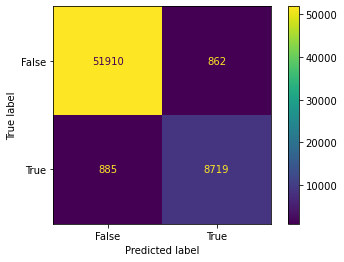

In [152]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Random forest classifier

In [153]:
model1=RandomForestClassifier()#randomforestclassifier
model1.fit(x_train,y_train)#fit the training data

RandomForestClassifier()

In [154]:
#testing the score of the model using test data
model1.score(x_test,y_test)

0.970950365525202

In [155]:
#using cross validation it take different sample and perform the model
cross_val_score(model1,x,y,cv=5).mean()

0.8088227131222242

In [156]:
#confusion matrix
y_pre=model1.predict(x_test)

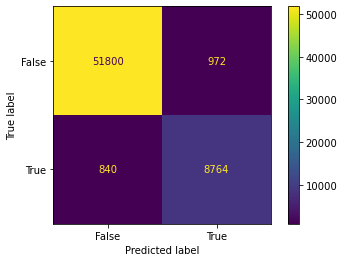

In [157]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Logistic regression

In [158]:
model2=LogisticRegression()#logistics regression model
model2.fit(x_train,y_train)#fit the training data

LogisticRegression()

In [159]:
#testing the score of the model using test data
model2.score(x_test,y_test)

0.8501506989867897

In [160]:
#using cross validation it take different sample and perform the model
cross_val_score(model2,x,y,cv=5).mean()

0.8462847400273091

# For classification problem especially binary(0,1) classification problem the logistics regression perform well and hence it is proved

In [161]:
#confusion matrix
predicted=model2.predict(x_test)

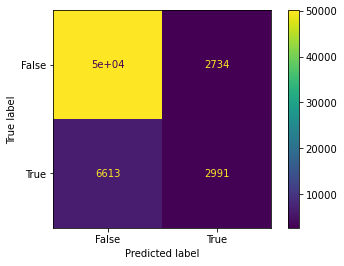

In [162]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Conclusion

# The model of Logistic Regression gives us the best score of 85% overall and cross_validation is also used in it 